In [2]:
!pip install tensorflow

     ---------------------------------------- 0.0/48.7 kB ? eta -:--:--
     ---------------------------------------- 48.7/48.7 kB 2.4 MB/s eta 0:00:00
   ---------------------------------------- 0.0/377.0 MB ? eta -:--:--
   ---------------------------------------- 0.2/377.0 MB 5.9 MB/s eta 0:01:04
   ---------------------------------------- 0.4/377.0 MB 5.1 MB/s eta 0:01:14
   ---------------------------------------- 0.6/377.0 MB 5.1 MB/s eta 0:01:15
   ---------------------------------------- 0.8/377.0 MB 4.8 MB/s eta 0:01:19
   ---------------------------------------- 1.1/377.0 MB 4.8 MB/s eta 0:01:19
   ---------------------------------------- 1.4/377.0 MB 4.8 MB/s eta 0:01:19
   ---------------------------------------- 1.7/377.0 MB 5.3 MB/s eta 0:01:11
   ---------------------------------------- 1.9/377.0 MB 5.3 MB/s eta 0:01:11
   ---------------------------------------- 2.2/377.0 MB 5.3 MB/s eta 0:01:12
   ---------------------------------------- 2.6/377.0 MB 5.6 MB/s eta 0:01:

In [2]:
import tensorflow as tf
from tensorflow.keras import layers, models

# Define the dimensions to which your images will be resized
image_height = 128
image_width = 128

# Define the number of classes (e.g., helmet, jacket, mask, no protection)
num_classes = 4

# Define your CNN model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(image_height, image_width, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(num_classes, activation='softmax')  # num_classes = number of classes (e.g., types of safety gear)
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Print model summary
model.summary()


C:\Users\Abinaya\anaconda_new\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     3,211,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │           516 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,305,156 (12.61 MB)

 Trainable params: 3,305,156 (12.61 MB)

 Non-trainable params: 0 (0.00 B)

In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Data augmentation and normalization for training
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

# Data normalization for validation
val_datagen = ImageDataGenerator(rescale=1./255)

# Load training data
train_generator = train_datagen.flow_from_directory(
    'train',
    target_size=(image_height, image_width),
    batch_size=32,
    class_mode='sparse'  # or 'categorical' if using one-hot encoding
)

# Load validation data
validation_generator = val_datagen.flow_from_directory(
    'valid',
    target_size=(image_height, image_width),
    batch_size=32,
    class_mode='sparse'  # or 'categorical' if using one-hot encoding
)


Found 2605 images belonging to 2 classes.
Found 114 images belonging to 2 classes.


In [4]:
# Train the model
model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=10,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size
)


Epoch 1/10


C:\Users\Abinaya\anaconda_new\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


81/81 ━━━━━━━━━━━━━━━━━━━━ 84s 898ms/step - accuracy: 0.9410 - loss: 0.0876 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 2/10
 1/81 ━━━━━━━━━━━━━━━━━━━━ 25s 315ms/step - accuracy: 1.0000 - loss: 0.0000e+00

C:\Users\Abinaya\anaconda_new\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


81/81 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 3/10
81/81 ━━━━━━━━━━━━━━━━━━━━ 73s 833ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 4/10
81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 5/10
81/81 ━━━━━━━━━━━━━━━━━━━━ 71s 811ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 6/10
81/81 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 7/10
81/81 ━━━━━━━━━━━━━━━━━━━━ 67s 775ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 8/10
81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 9/10
81/81 ━━━━━━━━━━━━━━━━━━━━ 66s 758ms/step - accuracy:

In [5]:
# Evaluate the model
test_loss, test_acc = model.evaluate(validation_generator, steps=validation_generator.samples // validation_generator.batch_size)
print(f'Test accuracy: {test_acc}')


3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 437ms/step - accuracy: 1.0000 - loss: 0.0000e+00
Test accuracy: 1.0


In [6]:
import tensorflow as tf
from tensorflow.keras import layers, models, regularizers

# Define the dimensions to which your images will be resized
image_height = 128
image_width = 128

# Define the number of classes (e.g., helmet, jacket, mask, no protection)
num_classes = 4

# Define your CNN model with Dropout and L2 regularization
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(image_height, image_width, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    layers.Dropout(0.5),
    layers.Dense(num_classes, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Print model summary
model.summary()


C:\Users\Abinaya\anaconda_new\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │     3,211,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 4)              │           516 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,305,156 (12.61 MB)

 Trainable params: 3,305,156 (12.61 MB)

 Non-trainable params: 0 (0.00 B)

In [8]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Data augmentation and normalization for training
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    fill_mode='nearest'
)

# Data normalization for validation
val_datagen = ImageDataGenerator(rescale=1./255)

# Load training data
train_generator = train_datagen.flow_from_directory(
    'train',
    target_size=(image_height, image_width),
    batch_size=32,
    class_mode='sparse'  # or 'categorical' if using one-hot encoding
)

# Load validation data
validation_generator = val_datagen.flow_from_directory(
    'valid',
    target_size=(image_height, image_width),
    batch_size=32,
    class_mode='sparse'  # or 'categorical' if using one-hot encoding
)


Found 2605 images belonging to 2 classes.
Found 114 images belonging to 2 classes.


In [9]:
from tensorflow.keras.callbacks import EarlyStopping

# Early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=50,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size,
    callbacks=[early_stopping]
)


Epoch 1/50
81/81 ━━━━━━━━━━━━━━━━━━━━ 74s 799ms/step - accuracy: 0.9638 - loss: 0.2391 - val_accuracy: 1.0000 - val_loss: 0.0648
Epoch 2/50
81/81 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 1.0000 - loss: 0.0648 - val_accuracy: 1.0000 - val_loss: 0.0641
Epoch 3/50
81/81 ━━━━━━━━━━━━━━━━━━━━ 68s 784ms/step - accuracy: 1.0000 - loss: 0.0529 - val_accuracy: 1.0000 - val_loss: 0.0292
Epoch 4/50
81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.0292 - val_accuracy: 1.0000 - val_loss: 0.0289
Epoch 5/50
81/81 ━━━━━━━━━━━━━━━━━━━━ 68s 785ms/step - accuracy: 1.0000 - loss: 0.0246 - val_accuracy: 1.0000 - val_loss: 0.0146
Epoch 6/50
81/81 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 1.0000 - loss: 0.0146 - val_accuracy: 1.0000 - val_loss: 0.0145
Epoch 7/50
81/81 ━━━━━━━━━━━━━━━━━━━━ 69s 799ms/step - accuracy: 1.0000 - loss: 0.0125 - val_accuracy: 1.0000 - val_loss: 0.0077
Epoch 8/50
81/81 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 1.0000 - loss: 0.0077 - val_accuracy: 1.0000

In [10]:
# Evaluate the model
test_loss, test_acc = model.evaluate(validation_generator, steps=validation_generator.samples // validation_generator.batch_size)
print(f'Test accuracy: {test_acc}')


3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 426ms/step - accuracy: 1.0000 - loss: 2.9650e-04
Test accuracy: 1.0


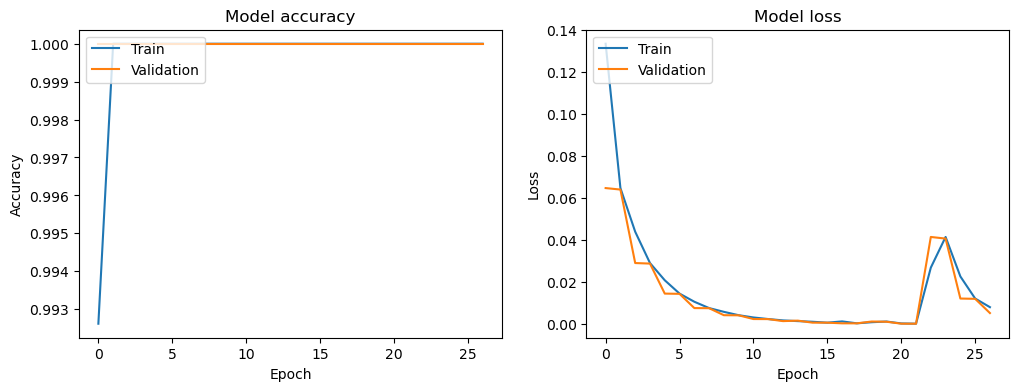

In [11]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()


In [1]:
import tensorflow as tf
import numpy as np
import cv2
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt


In [6]:
import tensorflow as tf
from tensorflow.keras import layers, models, regularizers

# Define the dimensions to which your images will be resized
image_height = 128
image_width = 128

# Define the number of classes (e.g., helmet, jacket, mask, no protection)
num_classes = 4

# Define your CNN model with Dropout and L2 regularization
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(image_height, image_width, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    layers.Dropout(0.5),
    layers.Dense(num_classes, activation='sigmoid')  # Using sigmoid for multi-label classification
])

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Print model summary
model.summary()

# Save the model in .keras format
model.save('model.keras')


C:\Users\Abinaya\anaconda_new\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     3,211,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │           516 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,305,156 (12.61 MB)

 Trainable params: 3,305,156 (12.61 MB)

 Non-trainable params: 0 (0.00 B)

In [9]:
from tensorflow.keras.models import load_model

# Load the model from .keras format
model = load_model('model.keras')


In [18]:
import cv2
import numpy as np
from tensorflow.keras.preprocessing.image import img_to_array

# Function to preprocess the image
def preprocess_image(image_path, target_size):
    # Load the image
    image = cv2.imread(image_path)
    
    # Convert the image from BGR to RGB
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
    # Resize the image while keeping the aspect ratio
    h, w, _ = image.shape
    scale = target_size / max(h, w)
    resized_image = cv2.resize(image, (int(w*scale), int(h*scale)))
    
    # Pad the image to the target size
    padded_image = np.zeros((target_size, target_size, 3), dtype=np.uint8)
    padded_image[:resized_image.shape[0], :resized_image.shape[1], :] = resized_image
    
    # Convert image to array and normalize
    image_array = img_to_array(padded_image) / 255.0
    
    # Expand dimensions to match model input
    image_array = np.expand_dims(image_array, axis=0)
    
    return image_array

# Function to predict safety gear
def predict_safety_gear_multi_label(image_path, model, target_size=128):
    # Preprocess the image
    preprocessed_image = preprocess_image(image_path, target_size)
    
    # Make prediction
    predictions = model.predict(preprocessed_image)
    
    # Decode the predictions
    class_labels = {0: 'No Protection', 1: 'Helmet', 2: 'Jacket', 3: 'Mask'}
    predicted_labels = []
    for i, prediction in enumerate(predictions[0]):
        if prediction > 0.5:  # Threshold can be adjusted
            predicted_labels.append(class_labels[i])
    
    return predicted_labels

# Path to the user input image
image_path = 'test/images/Inside-merge_mov-58_jpg.rf.50147e19cb655e74c2df0047113e82b2.jpg'

# Predict the safety gear
predicted_labels = predict_safety_gear_multi_label(image_path, model)

# Print the result
print(f'The worker is wearing: {", ".join(predicted_labels)}')


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
The worker is wearing: Jacket, Mask


In [20]:
from playsound import playsound


In [1]:
import os
import cv2
import numpy as np
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.models import load_model
from playsound import playsound  # Import playsound for alarm

# Function to preprocess the image
def preprocess_image(image_path, target_size):
    # Check if the file exists at the specified path
    if not os.path.exists(image_path):
        raise FileNotFoundError(f"Image file not found at the specified path: {image_path}")
    
    # Load the image
    image = cv2.imread(image_path)
    
    # Check if the image was loaded successfully
    if image is None:
        raise ValueError(f"Failed to load the image file: {image_path}")
    
    # Convert the image from BGR to RGB
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
    # Resize the image while keeping the aspect ratio
    h, w, _ = image.shape
    scale = target_size / max(h, w)
    resized_image = cv2.resize(image, (int(w*scale), int(h*scale)))
    
    # Pad the image to the target size
    padded_image = np.zeros((target_size, target_size, 3), dtype=np.uint8)
    padded_image[:resized_image.shape[0], :resized_image.shape[1], :] = resized_image
    
    # Convert image to array and normalize
    image_array = img_to_array(padded_image) / 255.0
    
    # Expand dimensions to match model input
    image_array = np.expand_dims(image_array, axis=0)
    
    return image_array

# Function to predict safety gear
def predict_safety_gear_multi_label(image_path, model, target_size=128):
    # Preprocess the image
    preprocessed_image = preprocess_image(image_path, target_size)
    
    # Make prediction
    predictions = model.predict(preprocessed_image)
    
    # Decode the predictions
    class_labels = {0: 'No Protection', 1: 'Helmet', 2: 'Jacket', 3: 'Mask'}
    predicted_labels = []
    for i, prediction in enumerate(predictions[0]):
        if prediction > 0.5:  # Threshold can be adjusted
            predicted_labels.append(class_labels[i])
    
    return predicted_labels

# Function to check for missing safety gear and raise an alarm
def check_and_raise_alarm(predicted_labels, required_gear):
    missing_gear = [gear for gear in required_gear if gear not in predicted_labels]
    
    if missing_gear:
        print(f"Alarm! The worker is missing the following safety gear: {', '.join(missing_gear)}")
        playsound('alaram.wav')  # Path to your alarm sound file
    else:
        print("All required safety gear is present.")

# Load the pre-trained model
model_path = 'model.keras'  # Update this path
model = load_model(model_path)

# Path to the user input image
image_path = 'test/images/003357_jpg.rf.9867f91e88089bb68dc95947d5116d14.jpg'  # Update this path

# Predict the safety gear
predicted_labels = predict_safety_gear_multi_label(image_path, model)

# Print the result
print(f'The worker is wearing: {", ".join(predicted_labels)}')

# Required safety gear
required_gear = ['Helmet', 'Jacket', 'Mask']

# Check for missing safety gear and raise an alarm if necessary
check_and_raise_alarm(predicted_labels, required_gear)


C:\Users\Abinaya\anaconda_new\Lib\site-packages\keras\src\saving\saving_lib.py:576: UserWarning: Skipping variable loading for optimizer 'adam', because it has 22 variables whereas the saved optimizer has 2 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 313ms/step



    Error 259 for command:
        play alaram.wav wait
    The driver cannot recognize the specified command parameter.

    Error 263 for command:
        close alaram.wav
    The specified device is not open or is not recognized by MCI.
Failed to close the file: alaram.wav


The worker is wearing: No Protection, Jacket, Mask
Alarm! The worker is missing the following safety gear: Helmet


PlaysoundException: 
    Error 259 for command:
        play alaram.wav wait
    The driver cannot recognize the specified command parameter.

In [4]:
!pip install pygame

   ---------------------------------------- 0.0/10.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/10.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/10.8 MB 445.2 kB/s eta 0:00:25
   ---------------------------------------- 0.0/10.8 MB 393.8 kB/s eta 0:00:28
   ---------------------------------------- 0.1/10.8 MB 573.4 kB/s eta 0:00:19
   ---------------------------------------- 0.1/10.8 MB 547.6 kB/s eta 0:00:20
   ---------------------------------------- 0.1/10.8 MB 516.7 kB/s eta 0:00:21
    --------------------------------------- 0.2/10.8 MB 546.6 kB/s eta 0:00:20
    --------------------------------------- 0.2/10.8 MB 525.1 kB/s eta 0:00:21
    --------------------------------------- 0.2/10.8 MB 513.4 kB/s eta 0:00:21
    --------------------------------------- 0.2/10.8 MB 479.2 kB/s eta 0:00:23
    --------------------------------------- 0.2/10.8 MB 492.1 kB/s eta 0:00:22
    --------------------------------------- 0.2/10.8 MB 503.2 kB/s eta

In [1]:
import os
import cv2
import numpy as np
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.models import load_model
import pygame  # Import pygame for alarm

# Function to preprocess the image
def preprocess_image(image_path, target_size):
    # Check if the file exists at the specified path
    if not os.path.exists(image_path):
        raise FileNotFoundError(f"Image file not found at the specified path: {image_path}")
    
    # Load the image
    image = cv2.imread(image_path)
    
    # Check if the image was loaded successfully
    if image is None:
        raise ValueError(f"Failed to load the image file: {image_path}")
    
    # Convert the image from BGR to RGB
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
    # Resize the image while keeping the aspect ratio
    h, w, _ = image.shape
    scale = target_size / max(h, w)
    resized_image = cv2.resize(image, (int(w*scale), int(h*scale)))
    
    # Pad the image to the target size
    padded_image = np.zeros((target_size, target_size, 3), dtype=np.uint8)
    padded_image[:resized_image.shape[0], :resized_image.shape[1], :] = resized_image
    
    # Convert image to array and normalize
    image_array = img_to_array(padded_image) / 255.0
    
    # Expand dimensions to match model input
    image_array = np.expand_dims(image_array, axis=0)
    
    return image_array

# Function to predict safety gear
def predict_safety_gear_multi_label(image_path, model, target_size=128):
    # Preprocess the image
    preprocessed_image = preprocess_image(image_path, target_size)
    
    # Make prediction
    predictions = model.predict(preprocessed_image)
    
    # Decode the predictions
    class_labels = {0: 'No Protection', 1: 'Helmet', 2: 'Jacket', 3: 'Mask'}
    predicted_labels = []
    for i, prediction in enumerate(predictions[0]):
        if prediction > 0.5:  # Threshold can be adjusted
            predicted_labels.append(class_labels[i])
    
    return predicted_labels

# Function to check for missing safety gear and raise an alarm
def check_and_raise_alarm(predicted_labels, required_gear):
    missing_gear = [gear for gear in required_gear if gear not in predicted_labels]
    
    if missing_gear:
        print(f"Alarm! The worker is missing the following safety gear: {', '.join(missing_gear)}")
        # Initialize pygame mixer
        pygame.mixer.init()
        # Load the alarm sound
        pygame.mixer.music.load('alaram.wav')  # Update this path
        # Play the alarm sound
        pygame.mixer.music.play()
    else:
        print("All required safety gear is present.")

# Load the pre-trained model
model_path = 'model.keras'  # Update this path
model = load_model(model_path)

# Path to the user input image
image_path = input('Enter the path of the image')  # Update this path

# Predict the safety gear
predicted_labels = predict_safety_gear_multi_label(image_path, model)

# Print the result
print(f'The worker is wearing: {", ".join(predicted_labels)}')

# Required safety gear
required_gear = ['Helmet', 'Jacket', 'Mask']

# Check for missing safety gear and raise an alarm if necessary
check_and_raise_alarm(predicted_labels, required_gear)


pygame 2.6.0 (SDL 2.28.4, Python 3.11.7)
Hello from the pygame community. https://www.pygame.org/contribute.html


C:\Users\Abinaya\anaconda_new\Lib\site-packages\keras\src\saving\saving_lib.py:576: UserWarning: Skipping variable loading for optimizer 'adam', because it has 22 variables whereas the saved optimizer has 2 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Enter the path of the image test/images/006463_jpg.rf.02f19082420ecc5537b9d59abbe6050c.jpg


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 427ms/step
The worker is wearing: No Protection, Jacket, Mask
Alarm! The worker is missing the following safety gear: Helmet
